In [1]:
from plaidml.keras import install_backend
install_backend()

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

from code.util import *

# MLP w/ Engineered Features

In [2]:
BATCH_SIZE = 512
N_CLASS = 2
EPOCHS = 100

In [3]:
x = load("data/largefiles/x_feat.pkl")
y = load("data/largefiles/y_onehot.pkl")

In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)

In [5]:
print(x.shape, y.shape)

(127284, 50) (127284, 2)


In [6]:
model_input = Input(shape=(50, ))
H = Dense(50, activation="tanh")(model_input)
H = Dropout(0.1)(H)
H = Dense(50, activation="tanh")(H)
H = Dropout(0.1)(H)
model_output = Dense(N_CLASS, activation="softmax")(H)

model = Model(inputs=model_input, outputs=model_output)
model.summary()

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
dense (Dense)                (None, 50)                2550      
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 102       
Total params: 5,202
Trainable params: 5,202
Non-trainable params: 0
___________________________________________________________

In [7]:
es = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    validation_data=(x_test, y_test),
    callbacks=[es]
)

score = model.evaluate(x_test, y_test, verbose=0)

W0819 23:59:34.725711 4521944512 deprecation.py:323] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 89098 samples, validate on 38186 samples
Epoch 1/100
89098/89098 [==============================] - 1s 7us/sample - loss: 0.3441 - accuracy: 0.8625 - val_loss: 0.1919 - val_accuracy: 0.9303
Epoch 2/100
89098/89098 [==============================] - 0s 4us/sample - loss: 0.1787 - accuracy: 0.9364 - val_loss: 0.1588 - val_accuracy: 0.9434
Epoch 3/100
89098/89098 [==============================] - 0s 4us/sample - loss: 0.1596 - accuracy: 0.9432 - val_loss: 0.1527 - val_accuracy: 0.9470
Epoch 4/100
89098/89098 [==============================] - 0s 4us/sample - loss: 0.1545 - accuracy: 0.9458 - val_loss: 0.1482 - val_accuracy: 0.9480
Epoch 5/100
89098/89098 [==============================] - 0s 4us/sample - loss: 0.1503 - accuracy: 0.9475 - val_loss: 0.1465 - val_accuracy: 0.9485
Epoch 6/100
89098/89098 [==============================] - 0s 4us/sample - loss: 0.1497 - accuracy: 0.9477 - val_loss: 0.1502 - val_accuracy: 0.9481
Epoch 7/100
89098/89098 [==============================]

In [8]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.132469056143819
Test accuracy: 0.953517


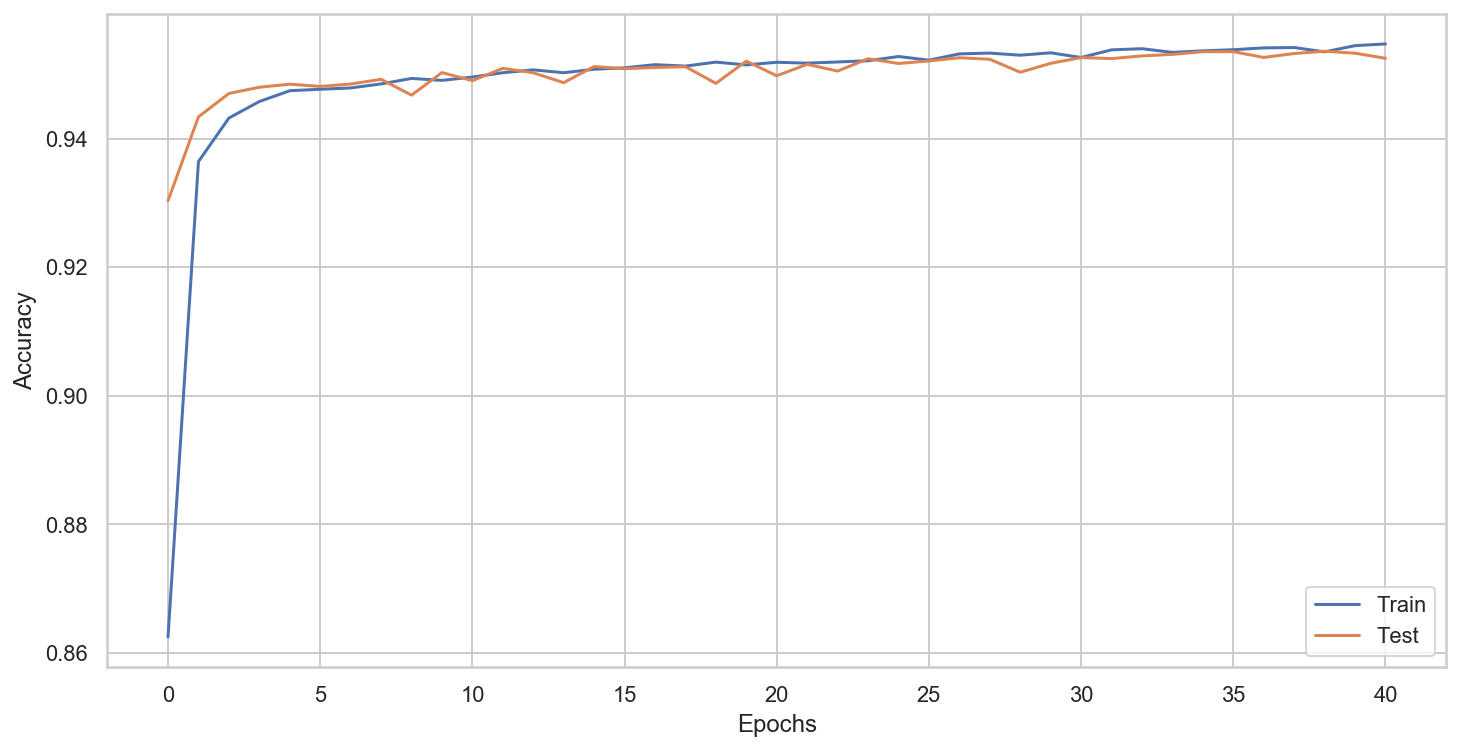

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Test")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [10]:
model.save("models/mlp.h5")